<a href="https://colab.research.google.com/github/noturnon2/myshare/blob/master/YFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consulta de Ativos

In [2]:
# Site para verificar todas siglas de ativos
# https://finance.yahoo.com/
# Código extraído do Canal Nerd dos Dados e utilizado como objeto de estudo e treino.

In [ ]:
!pip install pandas_ta
!pip install numpy
!pip install mplfinance
!pip install pandas_datareader
!pip install --upgrade pandas pandas-datareader
!pip install ta-lib
!pip install yfinance=='0.2.55'
#Hoje 14/07/2025 tive que instalar essa versão devido a problemas de imcompatibilidade,
#como o obejtivo é aprendizado não vejo nenhum problema, porém creio que deva ter outras bibliotecas para esse fim.

In [19]:
!pip uninstall -y pandas numpy
!pip install pandas==2.2.2 numpy==1.26.4
#Fiz o donwgrade do Pandas devido a problemas de compatibilidade com as versões das funções apresentadas aqui, mais uma vez
#como o obejtivo é aprendizado não vejo nenhum problema, porém creio que deva ter outras bibliotecas para esse fim.

Found existing installation: pandas 2.3.1
Uninstalling pandas-2.3.1:
  Successfully uninstalled pandas-2.3.1
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [127]:
import yfinance as yF
import pandas as pd
import pandas_ta as ta
from numpy import NaN as npNaN
#from pandas_datareader import data as web
from pandas_datareader import data as pdr
import mplfinance as mpf
import datetime as dt
from datetime import datetime
#import yfinance
#yfinance.pdr_override()

# Plotar Gráficos
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.options.display.float_format = '{:.2f}'.format



In [35]:
# Carregando as cotações
#Cotacoes = yF.Ticker("PETR4.SA") #Petrobrás
cotacoes = yF.Ticker("ITUB3.SA") #Itaú SA

# Opções de período 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, e ytd
dados = cotacoes.history(period="3mo")
dados.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-14 00:00:00-03:00,28.11,28.26,27.91,28.19,312300,0.00,0.00
2025-04-15 00:00:00-03:00,28.05,28.46,28.01,28.41,372100,0.00,0.00
2025-04-16 00:00:00-03:00,28.26,28.41,28.14,28.32,361000,0.00,0.00
2025-04-17 00:00:00-03:00,28.28,28.38,28.06,28.33,328200,0.00,0.00
2025-04-22 00:00:00-03:00,28.38,28.95,28.20,28.81,894900,0.00,0.00


In [57]:
# Bitcoin --> BTC-USD
# Bovespa --> ^BVSP
# Itaú --> ITUB3.SA

#Ativos
#acoes = ["ITUB3.SA", "BVSP"^, "BTC-USD"]
acoes = ["ITUB"]
data_inicial = "2025-01-01"
data_final = "2025-07-13"
#data_final = dt.datetime.now()

#Cotacoes = pdr.get_data_yahoo(acoes, data_inicial, data_final)
#Cotacoes = web.DataReader(acoes, 'yahoo', data_inicial, data_final)["Adj Close"]
cotacoes = yF.download(acoes, start=data_inicial, end=data_final, auto_adjust=False)
cotacoes.head()
cotacoes.tail()
#fechamento_ajustado = cotacoes['Adj Close']


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ITUB,ITUB,ITUB,ITUB,ITUB,ITUB
Date,,,,,,
2025-07-07,6.84,6.84,6.92,6.79,6.90,21784300
2025-07-08,6.81,6.81,6.84,6.75,6.81,21395900
2025-07-09,6.65,6.65,6.81,6.62,6.81,20857000
2025-07-10,6.37,6.37,6.46,6.35,6.45,52426300
2025-07-11,6.30,6.30,6.34,6.25,6.29,40787900


In [52]:
#Preview do resultado das BB
dados.ta.bbands(length=5, std=2.0, append=True).head()

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2025-04-14 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2025-04-15 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2025-04-16 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2025-04-17 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2025-04-22 00:00:00-03:00,27.98,28.41,28.83,2.99,0.97


In [156]:
# Parâmetros
leng = 5
desv = 2.0

# Definindo dataframe com as Banda de Bollinger
df2 = dados.ta.bbands(length=leng, std=desv)


<Axes: xlabel='Date'>

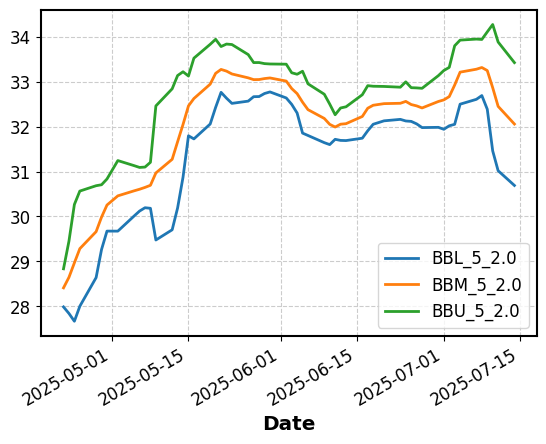

In [154]:
# Plot de diagnóstico
df2.iloc[:,:3].plot()

<Axes: xlabel='Date'>

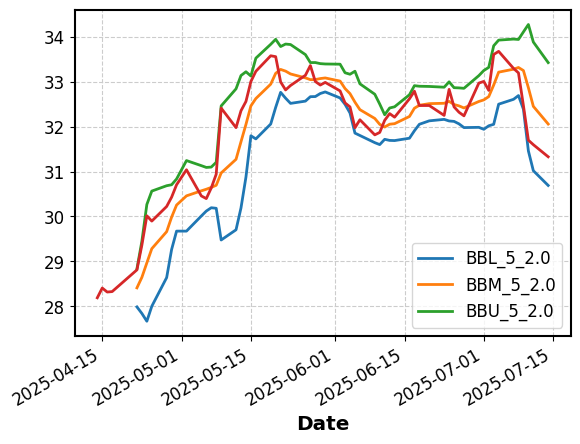

In [155]:
# Plot de preço de fechamento e a Bandas de Bollinger
(df2).iloc[:,:3].plot()
dados['Close'].plot()

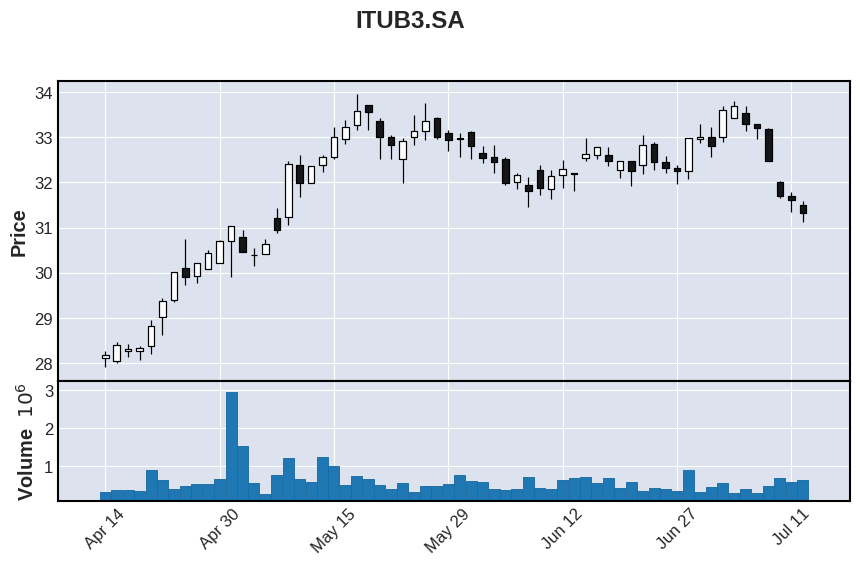

In [78]:
# Plot com as velas de preço
mpf.plot(dados, type = 'candle', figsize  = (11,6), volume = True, title = 'ITUB3.SA')

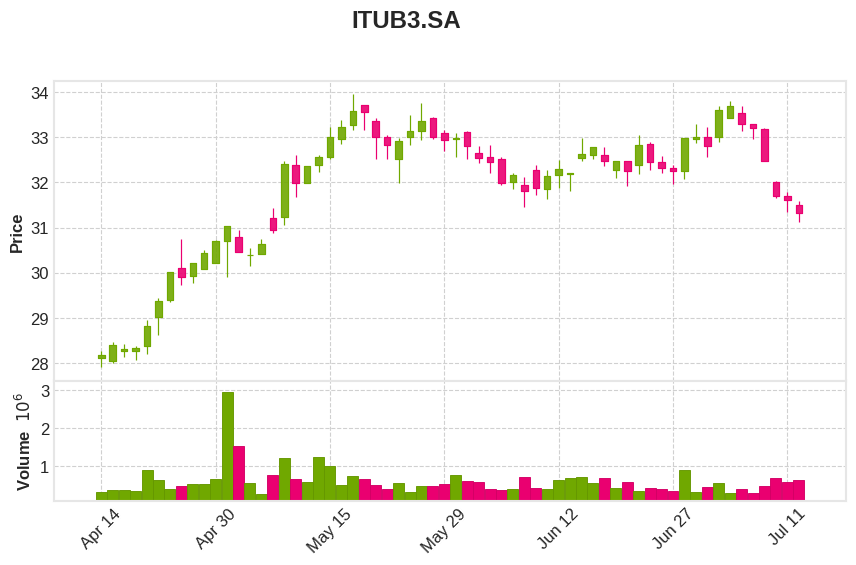

In [79]:
# Estilo Binance
mpf.plot(dados, type = 'candle', figsize  = (11,6), volume = True, title = 'ITUB3.SA', style = 'binance')

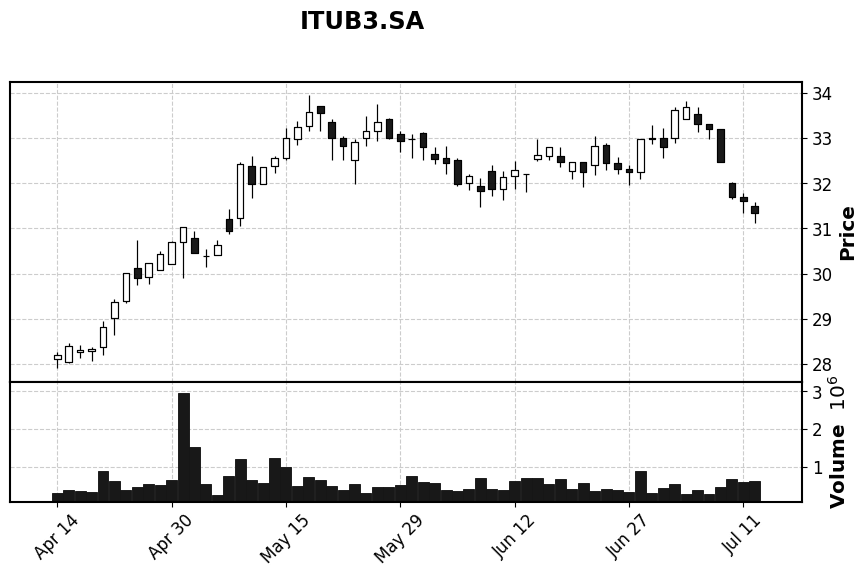

In [80]:
# Estilo Classic
mpf.plot(dados, type = 'candle', figsize  = (11,6), volume = True, title = 'ITUB3.SA', style = 'classic')

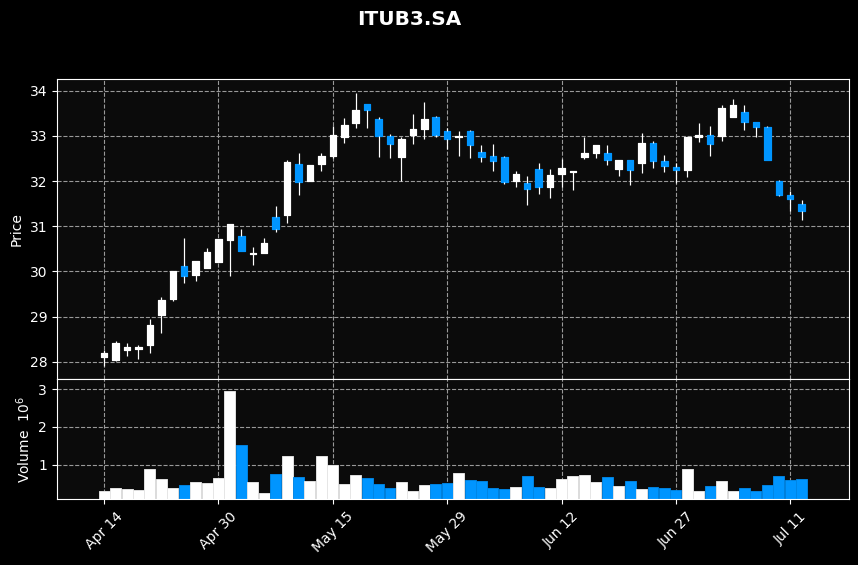

In [81]:
# Estilo Nigthclouds
mpf.plot(dados, type = 'candle', figsize  = (11,6), volume = True, title = 'ITUB3.SA', style = 'nightclouds')

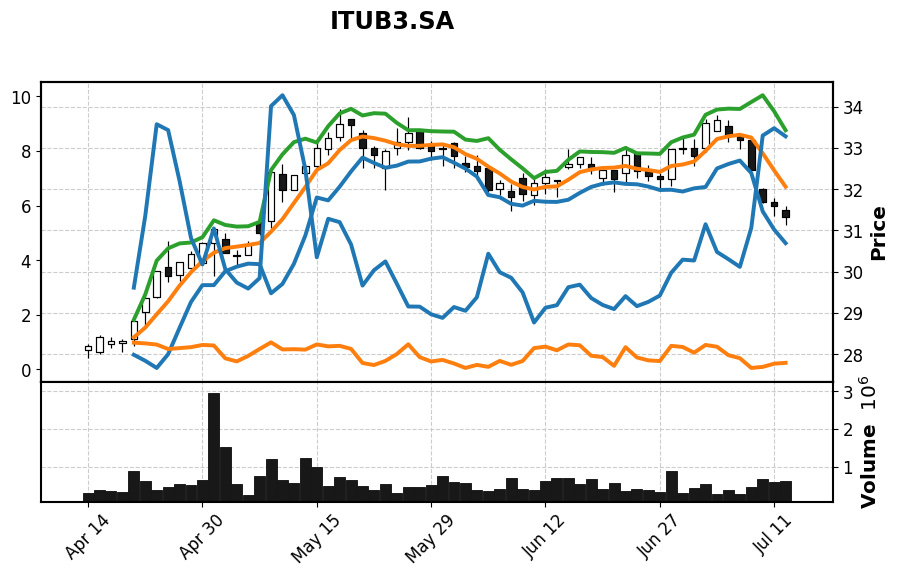

In [88]:
# Adicionando as bandas de Bollinger com as velas de preço
mpf.plot(dados, type = 'candle', figsize  = (11,6), volume = True, title = 'ITUB3.SA', style = 'classic', addplot = [mpf.make_addplot(df2)])

<Axes: xlabel='Date', ylabel='Price'>

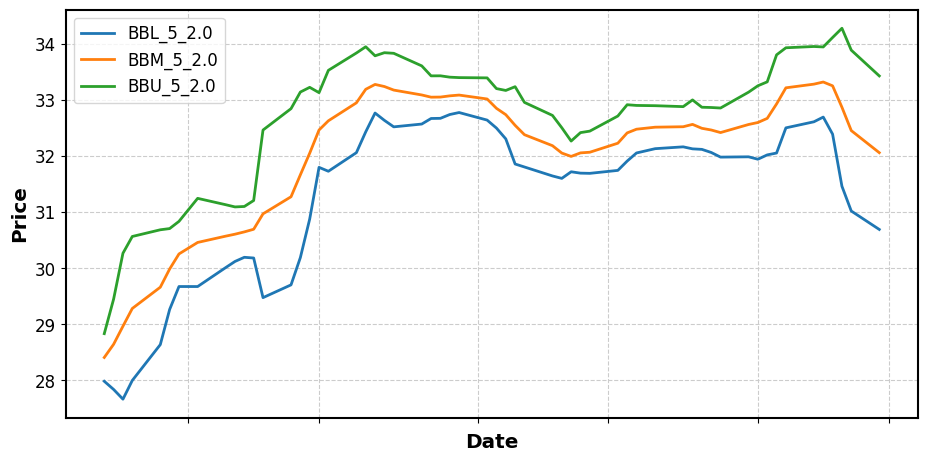

In [87]:
# Adicionando as bandas de Bollinger com as velas de preço
# mpf.plot(dados, type = 'candle', figsize  = (11,6), volume = True, title = 'ITUB3.SA', style = 'classic', addplot = [mpf.make_addplot(df2)])
fig, ax = plt.subplots(figsize=(11,6))
mpf.plot(dados, type = 'candle', ax=ax)
(df2).iloc[:,:3].plot(ax=ax)

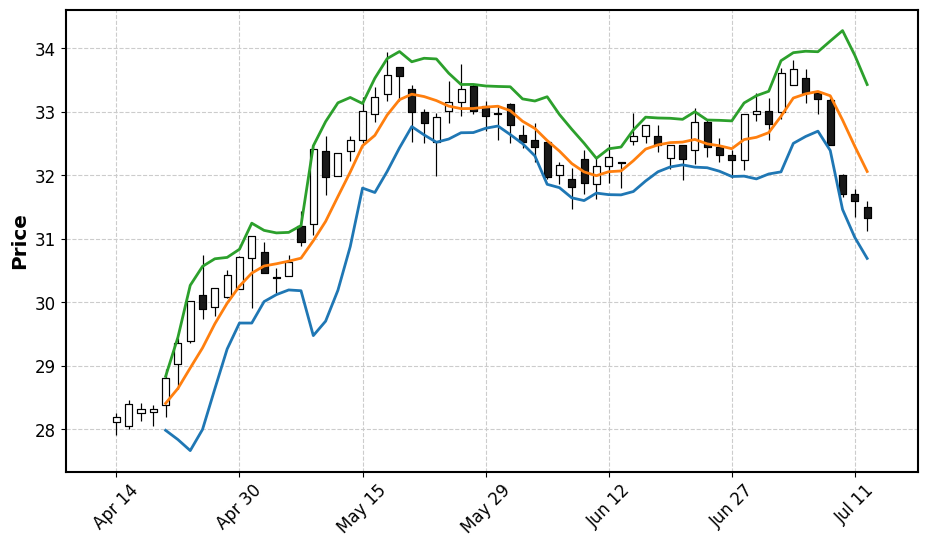

In [93]:
# Adicionando as bandas de Bollinger com as velas de preço - 2ª Tentativa

fig, ax = plt.subplots(figsize=(11,6))
mpf.plot(dados, type = 'candle', ax=ax)
df2['aux'] = range(0, dados.shape[0])
plt.plot(df2['aux'], df2.iloc[:,:3]);

In [99]:
fig1 = px.line(df2,
               x=df2.index,
               y=[f"BBL_{leng}_{desv}", f"BBU_{leng}_{desv}", f"BBM_{leng}_{desv}"])
               #y=df2.iloc[:,:3])
fig1.show()

In [144]:
# Adicionando figura com as velas de preço
fig = go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'],
                name="plot")])

# Removendo a range slider
fig.update_layout(xaxis_rangeslider_visible=False)

# Adicionando elementos de layout
fig.update_layout(
    #title = dict(text="Cotação PETR4", font=dict(size=40), automargin=False, yref='paper'),
    title = dict(text="Cotação ITUB3.SA", font=dict(size=40), yref='paper'),
    xaxis_title = dict(text="<b> DATA </b>", font=dict(size=30)),
    yaxis_title = dict(text="<b> PREÇO (R$) </b>", font=dict(size=30)),
    font_family = "Courier New",
    font_color = "black",
    font_size = 40,
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",
    height=600,
    width=1024,

    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linewidth=2,
        linecolor='white',
        #mirror=True,
        ticks='outside',
        tickfont=dict(
            family='Arial Black',
            size=15,
            color='black'
        ),
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linewidth=2,
        linecolor='white',
        #mirror=True,
        ticks='outside',
        tickfont=dict(
            family='Arial Black',
            size=15,
            color='blue'
        ),
    ),

)

# Mostrando plot Final
fig.show()

In [173]:
# Adicionando figura com as velas de preço
fig_ = go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'],
                name="plot")])

# Removendo a range slider
fig_.update_layout(xaxis_rangeslider_visible=False)

# Figura com as bandas de Bollinger
fig2 = px.line(df2,
               x=df2.index,
               y=[f"BBL_{leng}_{desv}", f"BBU_{leng}_{desv}", f"BBM_{leng}_{desv}"])

# Unindo as duas figuras

fig_final= go.Figure(data=fig_.data + fig2.data)
fig_final.update_layout(xaxis_rangeslider_visible=False)


# Adicionando elementos de layout
fig_final.update_layout(
    #title = dict(text="Cotação PETR4", font=dict(size=40), automargin=False, yref='paper'),
    title = dict(text="Cotação ITUB3.SA", font=dict(size=40), yref='paper'),
    xaxis_title = dict(text="<b> DATA </b>", font=dict(size=30)),
    yaxis_title = dict(text="<b> PREÇO (R$) </b>", font=dict(size=30)),
    font_family = "Courier New",
    font_color = "black",
    font_size = 40,
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",
    height=600,
    width=1600,

    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linewidth=2,
        linecolor='white',
        #mirror=True,
        ticks='outside',
        tickfont=dict(
            family='Arial Black',
            size=15,
            color='black'
        ),
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linewidth=2,
        linecolor='white',
        #mirror=True,
        ticks='outside',
        tickfont=dict(
            family='Arial Black',
            size=15,
            color='blue'
        ),
    ),

)

# Plot de volume

#fig_vol = px.bar(dados, x=dados.index, y='Volume')
#fig_vol.show()

# Figura com as bandas de Bollinger
fig3 = px.bar(dados,
               x=dados.index,
               y=["Volume"],
              height=600,
              width=1600)
fig3.show()

# Mostrando plot Final
fig_final.show()

In [171]:
# Fim do Código